In [65]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

prioritycalls = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefilelatlong/dpdshapefilelatlong.shp')
prioritycalls = prioritycalls.loc[~(prioritycalls["X"] == 0) & ~(prioritycalls["Y"] == 0) & ~(prioritycalls["Cancelled"] != 0)].copy()
prioritycalls = prioritycalls.loc[prioritycalls["Source"] != "Self Initiated"]
prioritycalls = prioritycalls.loc[prioritycalls["Beat"] != "DSO"]
prioritycalls = prioritycalls.loc[prioritycalls["Beat"] != "SSA"]
dpdbeats = ['511', '512', '513', '411', '111', '112', '214', '223']
prioritycalls = prioritycalls[prioritycalls['Beat'].isin(dpdbeats)] 
twotosix = ['2', '3', '4', '5', '6']
twotosixcalls = prioritycalls[prioritycalls['Priority'].isin(twotosix)] 
dpdspecificdata = twotosixcalls[twotosixcalls['Beat'].isin(dpdbeats)] 


print(dpdspecificdata.shape) 
dpdspecificdata.head(3)

(24182, 15)


,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (-78.87123 36.06210)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (-78.87486 35.99818)
8,21000015,None,1/1/2021,12:05:26AM,Wireless 911 Call,3,SOUND OF SHOTS,S ELM ST/ANGIER AVE,2032054,814699,D5,513,Resolved Without Report,0,POINT (-78.89165 35.98842)


In [10]:
twotosixcalls.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (-78.81280 35.99886)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (-78.91562 35.99174)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (-78.87123 36.06210)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (-78.84478 35.93921)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (-78.87486 35.99818)


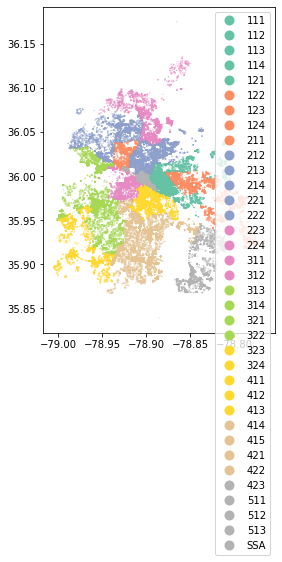

In [147]:
prioritycalls.plot(column='Beat', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.05, 
                         cmap="Set2", aspect=1);

In [70]:
#allpriorities = pd.DataFrame(prioritycalls.groupby("Beat").agg({'Event Numb':'count'}))
#allpriorities.rename(columns=({'Event Numb':'Count_of_calls'}),inplace = True)
#allpriorities.head()

In [55]:
policebeats = gpd.read_file('/Users/erikrobertsson/Desktop/Police_Beats/Police_Beats.shp')

In [56]:
policebeats.rename(columns=({'LAWBEAT':'Beat'}),inplace = True)
specialbeats = ['2', '3', '4', '5', '6']
twotosixcalls = prioritycalls[prioritycalls['Priority'].isin(twotosix)] 
policebeats


,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,Beat,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,geometry
0,1,29657.869141,None,None,D2,299,SSA,None,2.075708e+07,29657.868615,"POLYGON ((-78.86588 36.18066, -78.86602 36.180..."
1,2,18915.720703,None,None,D2,299,SSA,None,2.086135e+06,18915.724912,"POLYGON ((-78.85731 36.17823, -78.85731 36.178..."
2,3,1193.728027,None,None,D2,299,SSA,None,6.682308e+04,1193.727878,"POLYGON ((-78.86585 36.18027, -78.86572 36.180..."
3,4,1308.963013,None,None,DSO,999,DSO,None,6.932677e+04,1308.962953,"POLYGON ((-78.86585 36.18027, -78.86635 36.179..."
4,5,1467.506958,None,None,DSO,999,DSO,None,8.512911e+04,1467.506955,"POLYGON ((-78.86452 36.17903, -78.86448 36.179..."
...,...,...,...,...,...,...,...,...,...,...,...
114,115,7055.019043,I,no,D3,324,324,None,1.669570e+06,7055.019084,"POLYGON ((-78.99155 35.88848, -78.99155 35.888..."
115,116,5532.483887,None,None,DSO,999,DSO,None,1.635085e+06,5532.483860,"POLYGON ((-78.83020 35.88529, -78.83020 35.885..."
116,117,5189.336914,I,no,D4,422,422,None,1.467878e+06,5189.336960,"POLYGON ((-78.93384 35.87957, -78.93383 35.880..."
117,118,18538.599609,I,no,D4,422,422,None,7.011386e+06,18538.594858,"POLYGON ((-78.93731 35.87502, -78.93724 35.875..."


In [57]:
allcalls = prioritycalls.groupby( ["Beat"] ).size().to_frame(name = 'calls_count').reset_index()
allcalls

,Beat,calls_count
0,111,2730
1,112,2662
2,214,3829
3,223,5371
4,411,3926
5,511,2564
6,512,2931
7,513,3617


In [58]:
onlydpdcalls = dpdspecificdata.groupby( ["Beat"] ).size().to_frame(name = 'dpdcalls_count').reset_index()
onlydpdcalls

,Beat,dpdcalls_count
0,111,2425
1,112,2352
2,214,3426
3,223,4811
4,411,3438
5,511,2295
6,512,2689
7,513,2746


In [59]:
combcalls = pd.merge(allcalls, onlydpdcalls, on ='Beat')
combcalls['propofdpdcalls']= combcalls['dpdcalls_count'] / combcalls['calls_count']
combcalls.sort_values(by='dpdcalls_count', inplace=True, ascending=False)
#combcalls = combcalls.drop(labels=[34], axis=0)
combcalls.head()

,Beat,calls_count,dpdcalls_count,propofdpdcalls
3,223,5371,4811,0.895736
4,411,3926,3438,0.875700
2,214,3829,3426,0.894751
7,513,3617,2746,0.759193
6,512,2931,2689,0.917434


In [60]:
policebeats["Beat"] = policebeats["Beat"].map(lambda g: str(int(g+0.1)))

In [61]:
policebeatswithcalls = policebeats.set_index('Beat').join(combcalls.set_index('Beat'))
policebeatswithcalls.head(3)

,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,geometry,calls_count,dpdcalls_count,propofdpdcalls
Beat,,,,,,,,,,,,,
111,50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",2730.0,2425.0,0.888278
112,51,26265.849609,I,yes,D1,112,None,2.079934e+07,26265.852604,"POLYGON ((-78.88787 36.01473, -78.88734 36.014...",2662.0,2352.0,0.883546
113,62,20667.539062,I,yes,D1,113,None,2.159195e+07,20667.538873,"POLYGON ((-78.87372 35.99369, -78.87458 35.991...",NaN,NaN,NaN


In [2]:
#policebeatswithcalls = pd.merge(combcalls, policebeats, on ='Beat')
#policebeatswithcalls.head(3)


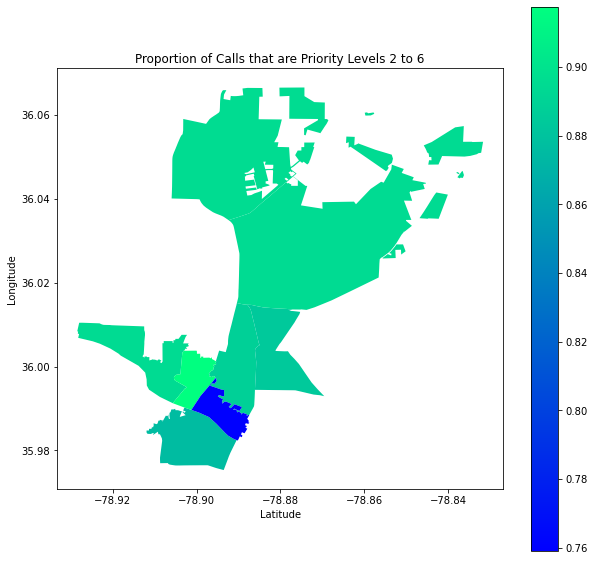

In [62]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
policebeatswithcalls.plot(column='propofdpdcalls',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

ax.set(title='Proportion of Calls that are Priority Levels 2 to 6')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

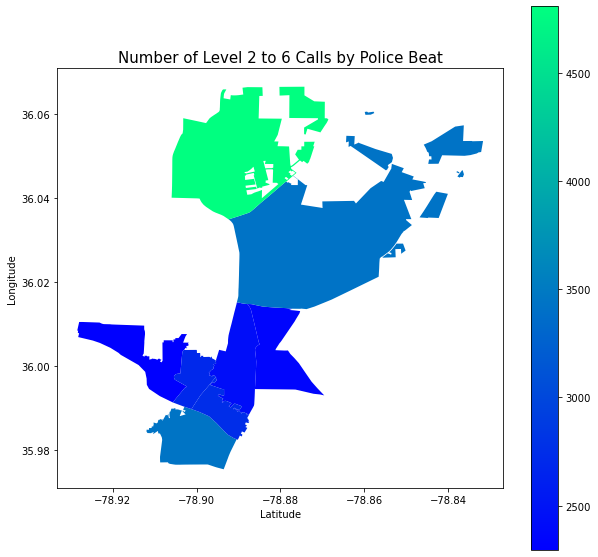

In [63]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
policebeatswithcalls.plot(column='dpdcalls_count',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

# ax.set(title='Number of Calls by Police Beat')
plt.title("Number of Level 2 to 6 Calls by Police Beat", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

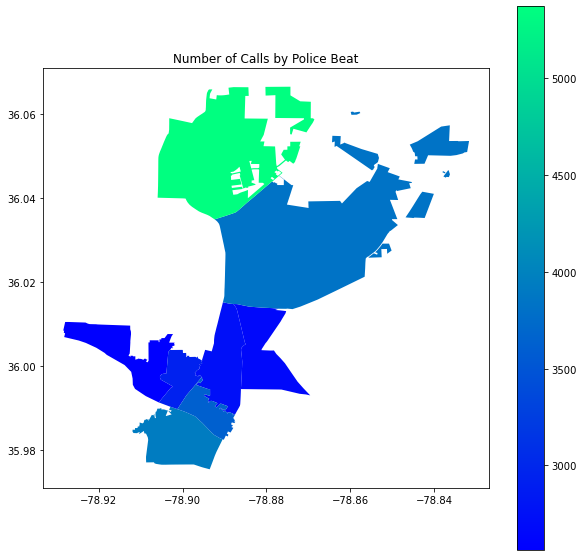

In [64]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
policebeatswithcalls.plot(column='calls_count',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

ax.set(title='Number of Calls by Police Beat')
plt.show()